# 7. Métricas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Etiquetas de Ejemplo

Clasificación binaria probabilística:<br>
Supongamos que contamos con un pequenio dataset de 10 observacines. Contamos con las etiquetas de salida de esas observacines.<br>
Por otro lado, como parte de un proyecto de **Machine Learning para CLASIFICACION** entrenamos un modelo y obtenemos los scores de salida predichos por la funcion de prediccion.

In [2]:
# etiquetas de salida (etiquetas verdaderas)
y_true = np.array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

# scores de salida predichos por el modelo.
# estos scores indican que probabilidad tienen la observacin correspondiente a pertenecer a una categoria determinada
y_pred_proba = np.array([.99, .98, .72, .70, .65, .51, .39, .24, .11, .01])

### (1) Clasificación binaria determinista: 
Vamos a comenzar poniendo un valor umbral de 0.5. La funcion de decision esta configurada de manera tal que los casos con score mayores a 0.5 los clasifica como 1 y los casos con score menores a 0.5 los clasifica como 0

In [3]:
treshold = 0.5

y_pred = ((y_pred_proba >= treshold)     # devuelve un boolean
         .astype(int))                   # al convertir los booleanos en int los True se transforman en 1, False en 0

y_pred


array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

### (2) Clasificación multiclase determinista:
Tambien podemos aplicar las metricas para evaluar el desempenio de un clasificador multiclase.

In [4]:
# inventamos un grupo de etiquetas verdaderas
y_true2 = ["cat", "ant", "cat", "cat", "ant", "bird"]

# inventamos un grupo de etiquetas de salida del clasificador (ya estaria aplicada la funcion de prediccion y 
# la funcion de decision)
y_pred2 = ["ant", "ant", "cat", "cat", "ant", "cat"]

## Precision, Recall y F1

La precision es la proporción de positivos propuestos por el modelo que fueron correctos:

$$Precision = \frac{|Train \cap Test|}{|Train|} = \frac{TP}{TP + FP}$$

La recall es la proporción de positivos correctos que fueron encontrados por el modelo:

$$Recall = \frac{|Train \cap Test|}{|Test|} = \frac{TP}{TP + FN}$$

$$F_1 = \frac{2 * Precision * Recall}{Precision + Recall}$$



Podemos usar sklearn para calcularlas:

### `precision_score`

La precision es la proporción de positivos propuestos por el modelo que fueron correctos:

$$Precision = \frac{|Train \cap Test|}{|Train|} = \frac{TP}{TP + FP}$$

In [5]:
# volvemos al caso del modelo de clasificacion binario.
y_true

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [6]:
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [7]:
from sklearn.metrics import precision_score

list_of_thresholds = [0.25, 0.5, 0.8] # vamos a evaluar 3 valores diferentes de threshold
print(' PRECISION RESULTS '.center(50, '-'))
print('-'*50)
for threshold in list_of_thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f'Treshold: {threshold}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print('-'*50)

--------------- PRECISION RESULTS ----------------
--------------------------------------------------
Treshold: 0.25
Precision: 0.5714285714285714
--------------------------------------------------
Treshold: 0.5
Precision: 0.6666666666666666
--------------------------------------------------
Treshold: 0.8
Precision: 1.0
--------------------------------------------------


Cuando mas estricta es nuestra funcion de decision, es decir cuanto mas alto es el valor del treshold, mayor es la precision del modelo. Recordemos que el valor del treshold se define en base al objetivo que tiene el modelo, no hay un numero CORRECTO o INCORRECTO. 

### `recall_score`
La recall es la proporción de positivos correctos que fueron encontrados por el modelo:

$$Recall = \frac{|Train \cap Test|}{|Test|} = \frac{TP}{TP + FN}$$

In [8]:
from sklearn.metrics import recall_score

list_of_thresholds = [0.25, 0.5, 0.8] # vamos a evaluar 3 valores diferentes de threshold
print(' RECALL RESULTS '.center(50, '-'))
print('-'*50)
for threshold in list_of_thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f'Treshold: {threshold}')
    print(f'Precision: {recall_score(y_true, y_pred)}')
    print('-'*50)


----------------- RECALL RESULTS -----------------
--------------------------------------------------
Treshold: 0.25
Precision: 0.8
--------------------------------------------------
Treshold: 0.5
Precision: 0.8
--------------------------------------------------
Treshold: 0.8
Precision: 0.4
--------------------------------------------------


### `f1_score`
$$F_1 = \frac{2 * Precision * Recall}{Precision + Recall}$$


In [9]:
from sklearn.metrics import f1_score
list_of_thresholds = [0.25, 0.5, 0.8] # vamos a evaluar 3 valores diferentes de threshold
print(' F1 RESULTS '.center(50, '-'))
print('-'*50)
for threshold in list_of_thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    print(f'Treshold: {threshold}')
    print(f'Precision: {f1_score(y_true, y_pred)}')
    print('-'*50)






------------------- F1 RESULTS -------------------
--------------------------------------------------
Treshold: 0.25
Precision: 0.6666666666666666
--------------------------------------------------
Treshold: 0.5
Precision: 0.7272727272727272
--------------------------------------------------
Treshold: 0.8
Precision: 0.5714285714285715
--------------------------------------------------


Para poder una metrica que combine la Precision y el Recall usamos la funcion F1

---
Para clasificación multiclase, se puede calcular una métrica por clase. Luego, las métricas se pueden promediar para obtener resultados "macro".
Para obtener resultados "micro", se hacen primero cálculos globales para TP, FP, TN, FN y luego se calcula como un problema binario.

---

## `classification_report()`

- [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

En clasificación binaria:

In [15]:
# supongamos que tenemos nuevamente un grupo de # etiquetas de salida (etiquetas verdaderas) y
# otro grupo de etiquetas predichas por el modelo de ML que estamos utilizando
y_true = [1, 1, 0, 1, 1, 0, 0, 1, 0, 0]
y_pred = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

y_true, y_pred

([1, 1, 0, 1, 1, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [16]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



In [17]:
# y si tuviesemos una clasificacion multiclase
y_true2, y_pred2

(['cat', 'ant', 'cat', 'cat', 'ant', 'bird'],
 ['ant', 'ant', 'cat', 'cat', 'ant', 'cat'])

In [18]:
print(classification_report(y_true2, y_pred2))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       0.00      0.00      0.00         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



C:\Users\nico.-\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nico.-\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nico.-\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## `confusion_matrix()`

Usamos [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_true, y_pred

([1, 1, 0, 1, 1, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [22]:
confusion_matrix(y_true, y_pred)

array([[3, 2],
       [1, 4]])

In [21]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

En multiclase:

In [22]:
cm = confusion_matrix(y_true2, y_pred2, labels=['ant', 'bird', 'cat'])
cm

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

Podemos usar [plot_confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) pero requiere el clasificador. Definimos nuestra propia versión:

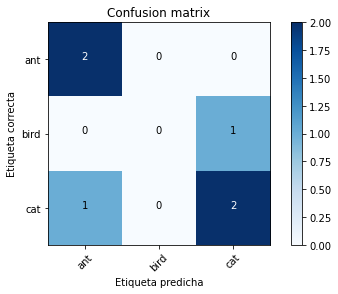

In [23]:
from utils import plot_confusion_matrix

plot_confusion_matrix(cm, ['ant', 'bird', 'cat'])

## `roc_curve()`

Usamos [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) para obtener los puntos y graficamos:

In [31]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_true, y_pred_proba, drop_intermediate=True)

In [32]:
false_positive_rate, true_positive_rate, threshold

(array([0. , 0. , 0. , 0.2, 0.2, 0.6, 0.6, 1. ]),
 array([0. , 0.2, 0.4, 0.4, 0.8, 0.8, 1. , 1. ]),
 array([1.99, 0.99, 0.98, 0.72, 0.65, 0.39, 0.24, 0.01]))

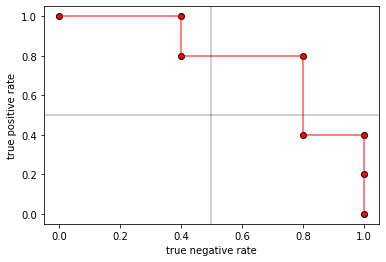

In [40]:
plt.plot(1.0 - false_positive_rate, true_positive_rate, color="red", alpha = 0.65)
plt.scatter(1.0 - false_positive_rate, true_positive_rate, color="red", edgecolors='black')
#plt.xlabel("false positive rate")

plt.axhline(y = 0.5, color = 'black', alpha = 0.25)
plt.axvline(x = 0.5, color = 'black', alpha = 0.25)

plt.xlabel("true negative rate")
plt.ylabel("true positive rate")
plt.show()

In [41]:
tpr[4], fpr[4], threshold[4]

(0.8, 0.2, 0.65)

## `roc_auc_score()`
Calculamos el área bajo la curva con [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html):<br>
Recordemos que cuanto mayor sea el area, mejor sera nuestro modelos de clasificacion.

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred_proba)

0.8

## `precision_recall_curve()`
Usamos [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) para obtener los puntos y graficamos:

In [43]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_true, y_pred_proba)

In [44]:
precision, recall, threshold

(array([0.5       , 0.55555556, 0.625     , 0.57142857, 0.66666667,
        0.8       , 0.75      , 0.66666667, 1.        , 1.        ,
        1.        ]),
 array([1. , 1. , 1. , 0.8, 0.8, 0.8, 0.6, 0.4, 0.4, 0.2, 0. ]),
 array([0.01, 0.11, 0.24, 0.39, 0.51, 0.65, 0.7 , 0.72, 0.98, 0.99]))

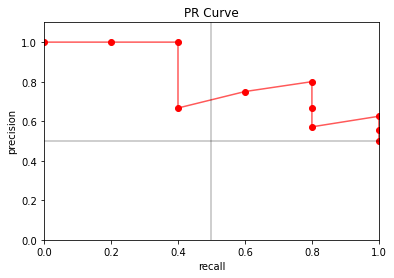

In [48]:
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.plot(recall, precision, color="red", alpha = 0.65)
plt.scatter(recall, precision, color="red")

plt.axhline(y = 0.5, color = 'black', alpha = 0.25)
plt.axvline(x = 0.5, color = 'black', alpha = 0.25)

plt.xlabel("recall")
plt.ylabel("precision")
plt.title('PR Curve')
plt.show()

Analizando la curva PR vemos que el mejor punto es (0.8, 0.8) que corresponde a un threshold de 0.51